In [1]:
%run talktools.py

Doing an `import *` is considered a bad practice

In [2]:
from __future__ import absolute_import, division, print_function
import numpy as np

In [4]:
a = np.array([1,2,3])
a

array([1, 2, 3])

In [5]:
b = np.ones((3,2)) # Rows and Columns 
b

array([[ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.]])

In [7]:
c = np.empty((3,2))
c

array([[ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.]])

In [9]:
d = np.zeros((3,2))
d

array([[ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.]])

In [10]:
for s in [1e3,1e5,1e7]:
    size = int(s)
    print('Timing array creation with:', size, 'elements')
    print("Zeros:")
    %timeit np.zeros(size)
    print("Empty:")
    %timeit np.empty(size)
    print("*"*20)

Timing array creation with: 1000 elements
Zeros:
The slowest run took 15.44 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 1.11 µs per loop
Empty:
The slowest run took 4.85 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 956 ns per loop
********************
Timing array creation with: 100000 elements
Zeros:
10000 loops, best of 3: 30.8 µs per loop
Empty:
The slowest run took 4.66 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 1.32 µs per loop
********************
Timing array creation with: 10000000 elements
Zeros:
10 loops, best of 3: 21.1 ms per loop
Empty:
100 loops, best of 3: 11.7 ms per loop
********************


In [12]:
np.linspace(1,10,5) # This is inclusive at the end

array([  1.  ,   3.25,   5.5 ,   7.75,  10.  ])

In [13]:
np.logspace(1,2,5)

array([  10.        ,   17.7827941 ,   31.6227766 ,   56.23413252,  100.        ])

In [15]:
np.arange(10) == np.array(range(10))

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,  True], dtype=bool)

## Structured Arrays

In [16]:
# a list of (name, format) tuples.
dtype_descriptor = [ ('x', np.int32), 
                     ('y', np.float32), 
                     ('name', (np.string_, 10)) ] 
my_arr = np.zeros(2, dtype=dtype_descriptor )

In [17]:
my_arr[:] = [(1,2.,'Hello'),(2,3.,"World")]
my_arr

array([(1, 2.0, b'Hello'), (2, 3.0, b'World')], 
      dtype=[('x', '<i4'), ('y', '<f4'), ('name', 'S10')])

In [18]:
my_arr[0] # this is a tuple

(1, 2.0, b'Hello')

In [19]:
my_arr[0][0] = -12

In [20]:
my_arr

array([(-12, 2.0, b'Hello'), (2, 3.0, b'World')], 
      dtype=[('x', '<i4'), ('y', '<f4'), ('name', 'S10')])

In [21]:
my_arr.shape

(2,)

Note that the above dtype descriptor can also be specified with the following syntax instead, which is fully equivalent in functionality:

In [22]:
# A dict with keys 'names' and 'formats', and values respectively tuples with all
# names and all format descriptors. 
# Note that 'S10' is equivalent to (np.string_, 10) to describe a 10-character string
dtype_descriptor = dict(names = ('x', 'y', 'name'),
                        formats = (np.int32, np.float32, 'S10'))

In [23]:
my_arr[1]

(2, 3.0, b'World')

In [24]:
y = my_arr['y']
y

array([ 2.,  3.], dtype=float32)

In [25]:
y[:] = 2*y
y

array([ 4.,  6.], dtype=float32)

In [26]:
my_arr

array([(-12, 4.0, b'Hello'), (2, 6.0, b'World')], 
      dtype=[('x', '<i4'), ('y', '<f4'), ('name', 'S10')])

##   Copying and Referencing

In [27]:
lst1 = list(range(10))
print('lst1:', lst1)
lst2 = lst1
lst1 is lst2

lst1: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


True

In [28]:
lst2[0] = -9999
lst1

[-9999, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [29]:
lst3 = lst1[::2]
print('lst1:', lst1)
print('lst3:', lst3)

lst1: [-9999, 1, 2, 3, 4, 5, 6, 7, 8, 9]
lst3: [-9999, 2, 4, 6, 8]


In [30]:
lst3[0] = 100
lst3[1] = 200
print('lst1:', lst1)
print('lst3:', lst3)

lst1: [-9999, 1, 2, 3, 4, 5, 6, 7, 8, 9]
lst3: [100, 200, 4, 6, 8]


In [31]:
a1 = np.arange(10)
a2 = a1[::2]
print('a1', a1)
print('a2', a2)

a1 [0 1 2 3 4 5 6 7 8 9]
a2 [0 2 4 6 8]


In [34]:
a1[0] = -99
print('a1', a1)
print('a2', a2)

a1 [  -99     1 -9999     3     4     5     6     7     8     9]
a2 [  -99 -9999     4     6     8]


In [35]:
a2[1] = -9999
print('a1', a1)
print('a2', a2)

a1 [  -99     1 -9999     3     4     5     6     7     8     9]
a2 [  -99 -9999     4     6     8]


In [36]:
a2.base is a1

True

In [37]:
print('Data type                :', a1.dtype)
print('Total number of elements :', a1.size)
print('Number of dimensions     :', a1.ndim)
print('Shape (dimensionality)   :', a1.shape)
print('Memory used (in bytes)   :', a1.nbytes)

Data type                : int64
Total number of elements : 10
Number of dimensions     : 1
Shape (dimensionality)   : (10,)
Memory used (in bytes)   : 80


In [38]:
print('Minimum and maximum             :', np.min(a1), np.max(a1))
print('Sum and product of all elements :', np.sum(a1), np.prod(a1))
print('Mean and standard deviation     :', np.mean(a1), np.std(a1))

Minimum and maximum             : -9999 9
Sum and product of all elements : -10055 179607637440
Mean and standard deviation     : -1005.5 2997.99567211


In [39]:
a1 = a1.reshape((2,5))
print('For the following array:\n', a1)
print('The sum of elements along the rows is    :', np.sum(a1, axis=1))
print('The sum of elements along the columns is :', np.sum(a1, axis=0))

For the following array:
 [[  -99     1 -9999     3     4]
 [    5     6     7     8     9]]
The sum of elements along the rows is    : [-10090     35]
The sum of elements along the columns is : [  -94     7 -9992    11    13]


Wheen you re-shape you are not creating new data, instead you are cretaing a new `view` of the data.

In [40]:
a1 = np.arange(20).reshape(4,5)

In [44]:
a1.flags.owndata

False

In [45]:
a3 = a1[::2]

In [46]:
a3.base is a1

False

## The array `flags` field

In [47]:
a1.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  UPDATEIFCOPY : False

In [49]:
a3.flags

  C_CONTIGUOUS : False
  F_CONTIGUOUS : False
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  UPDATEIFCOPY : False

In [50]:
a1.flags.owndata

False

In [51]:
print(a1)
print(a1.shape, a1.dtype)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]
(4, 5) int64


In [52]:
a3 = a1.astype(np.int8)
print(a3.shape, a3.dtype)

(4, 5) int8


In [53]:
print(a3)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]


In [54]:
a3.flags.owndata

True

In [55]:
b = a1.copy()

In [56]:
b is a1

False

In [57]:
b.base is a1

False

In [58]:
b[0] = 1234
b

array([[1234, 1234, 1234, 1234, 1234],
       [   5,    6,    7,    8,    9],
       [  10,   11,   12,   13,   14],
       [  15,   16,   17,   18,   19]])

In [59]:
a1

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

In [60]:
a1 = np.arange(10)
a1.base is a1

False

In [61]:
a1.flags.owndata

True

## Quick recap of array access

In [62]:
a = np.arange(10)**3

In [63]:
a

array([  0,   1,   8,  27,  64, 125, 216, 343, 512, 729])

In [64]:
a[2]

8

In [65]:
a[2:5]

array([ 8, 27, 64])

In [66]:
a[:6:2] = -1000

In [67]:
a

array([-1000,     1, -1000,    27, -1000,   125,   216,   343,   512,   729])

In [68]:
a[::-1]
a

array([-1000,     1, -1000,    27, -1000,   125,   216,   343,   512,   729])

In [69]:
for i in a:
    print(i**(1/3.), end=" ... ")

nan ... 1.0 ... nan ... 3.0 ... nan ... 5.0 ... 6.0 ... 7.0 ... 8.0 ... 9.0 ... 

/Users/Kamilobu/anaconda/envs/ay250/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in power
  from ipykernel import kernelapp as app


In [71]:
b=a**(-1/3.) ; print(b[0])

nan


/Users/Kamilobu/anaconda/envs/ay250/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in power
  if __name__ == '__main__':


In [72]:
b[0] == np.nan

False

In [73]:
np.isnan(b[0])

True

## Numpy "fancy indexing"

In [74]:
a = np.arange(12)**2                          # the first 12 square numbers
i = np.array( [ 1,1,3,8,5 ] )                 # an array of indices
a[i]                                       # the elements of a at the positions i

array([ 1,  1,  9, 64, 25])

In [75]:
j = np.array( [ [ 3, 4], [ 9, 7 ] ] )
a[j]

array([[ 9, 16],
       [81, 49]])

In [76]:
a = np.arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [77]:
i = np.array( [ [0,1], [1,2] ] )  # our output will be shaped (2,2)
j = np.array( [ [2,1], [3,3] ] )

In [78]:
a[i,j]

array([[ 2,  5],
       [ 7, 11]])

In [81]:
b

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [79]:
b = a.ravel()

In [80]:
b.flags.owndata


False

<div class="alert alert-info"> 
<font size=+1>in general, ndarrays methods which return ndarrays, return views.

Functions which operate on ndarrays, return new ndarrays</font>
</div>

In [82]:
a = np.array([1, 3, 0, -5, 0], float)

In [83]:
a != 0

array([ True,  True, False,  True, False], dtype=bool)

In [84]:
a[a != 0]

array([ 1.,  3., -5.])

In [85]:
nz = np.where(a != 0)
nz

(array([0, 1, 3]),)

In [86]:
a[nz]

array([ 1.,  3., -5.])

In [87]:
x = np.arange(9.).reshape(3, 3)
x

array([[ 0.,  1.,  2.],
       [ 3.,  4.,  5.],
       [ 6.,  7.,  8.]])

In [88]:
x[np.where( x > 5 )]

array([ 6.,  7.,  8.])

In [92]:
x[(x>5) & (x<7)]

array([ 6.])

In [90]:
np.where(a != 0.0, 1/a, a)  # if a!=0, return 1/0, else return a

/Users/Kamilobu/anaconda/envs/ay250/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':


array([ 1.        ,  0.33333333,  0.        , -0.2       ,  0.        ])

## Universal Functions

In [93]:
a = np.array([[1, 2], [3, 4]])
b = np.array([[2, 3], [4, 5]])

In [94]:
a +  b

array([[3, 5],
       [7, 9]])

In [95]:
np.multiply(a,b)  # identical to a*b

array([[ 2,  6],
       [12, 20]])

In [96]:
np.power(a,b)  # identical to a**b

array([[   1,    8],
       [  81, 1024]])

In [97]:
a = np.array([[1, 2], [3, 4]])

In [98]:
np.mean(a), a.mean()

(2.5, 2.5)

In [99]:
np.mean(a, axis=0), np.mean(a, axis=1)

(array([ 2.,  3.]), array([ 1.5,  3.5]))

In [100]:
np.std(a)

1.1180339887498949

In [101]:
np.average(range(1,11), weights=range(10,0,-1))

4.0

## Vectorizing with `numexpr`

In [102]:
a = np.arange(1e6)
b = np.arange(1e6)

In [103]:
%timeit a**2 + b**2 + 2*a*b

10 loops, best of 3: 20 ms per loop


In [104]:
!conda install numexpr -y

Fetching package metadata .........
Solving package specifications: ..........

Package plan for installation in environment /Users/Kamilobu/anaconda/envs/ay250:

The following packages will be UPDATED:

    numexpr: 2.6.0-np111py35_0 --> 2.6.1-np111py35_0

Unlinking packages ...
[      COMPLETE      ]|###################################################| 100%
Linking packages ...
[      COMPLETE      ]|###################################################| 100%


In [105]:
import numexpr as ne

In [106]:
%timeit ne.evaluate("a**2 + b**2 + 2*a*b")

100 loops, best of 3: 4.21 ms per loop


In [107]:
ne.set_num_threads(2)

4

In [108]:
%timeit ne.evaluate("a**2 + b**2 + 2*a*b")

100 loops, best of 3: 4.39 ms per loop


## Broadcasting

### The broadcasting rules

This broadcasting behavior is powerful, especially because when numpy broadcasts to create new dimensions or to 'stretch' existing ones, it doesn't replicate the data.  In the example above the operation is carried *as if* the 3 was a 1-d array with 3 in all of its entries, but no actual array was ever created.  This can save memory in cases when the arrays in question are large, with significant performance implications.

The general rule is: when operating on two arrays, NumPy compares their shapes element-wise. It starts with the trailing dimensions, and works its way forward, creating dimensions of length 1 as needed. Two dimensions are considered compatible when

* they are equal or either is None or one
* either dimension is 1 or ``None``, or if dimensions are equal

If these conditions are not met, a `ValueError: frames are not aligned` exception is thrown, indicating that the arrays have incompatible shapes. The size of the resulting array is the maximum size along each dimension of the input arrays.

Examples below:

```
(9, 5)   (9, 5)   (9, 5)   (9, 1)
   ( )   (9, 1)   (   5)   (   5)
------   ------   ------   ------
(9, 5)   (9, 5)   (9, 5)   (9, 5)

```

<img src="broadcast_rougier.png"/>

Sketch from [Nicolas Rougier's NumPy tutorial](http://www.labri.fr/perso/nrougier/teaching/numpy/numpy.html)

In [131]:
x = np.ones((5,5))
y = np.arange(5)
z = np.arange(10).reshape((1,10))
print(z)

[[0 1 2 3 4 5 6 7 8 9]]


In [132]:
print(z.T)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]


In [130]:
y**x

array([[ 0.,  1.,  2.,  3.,  4.],
       [ 0.,  1.,  2.,  3.,  4.],
       [ 0.,  1.,  2.,  3.,  4.],
       [ 0.,  1.,  2.,  3.,  4.],
       [ 0.,  1.,  2.,  3.,  4.]])

In [133]:
x = np.arange(4)
xx = x.reshape(4,1)
y = np.ones(5)
z = np.ones((3,4))

In [134]:
x.shape

(4,)

In [135]:
y.shape

(5,)

In [136]:
x + y

ValueError: operands could not be broadcast together with shapes (4,) (5,) 

In [137]:
xx.shape

(4, 1)

In [138]:
xx + y 

array([[ 1.,  1.,  1.,  1.,  1.],
       [ 2.,  2.,  2.,  2.,  2.],
       [ 3.,  3.,  3.,  3.,  3.],
       [ 4.,  4.,  4.,  4.,  4.]])

In [139]:
z.shape

(3, 4)

In [140]:
(x + z).shape

(3, 4)

In [141]:
xx + y

array([[ 1.,  1.,  1.,  1.,  1.],
       [ 2.,  2.,  2.,  2.,  2.],
       [ 3.,  3.,  3.,  3.,  3.],
       [ 4.,  4.,  4.,  4.,  4.]])

In [142]:
z.shape

(3, 4)

In [143]:
(x + z).shape

(3, 4)

In [144]:
x + z

array([[ 1.,  2.,  3.,  4.],
       [ 1.,  2.,  3.,  4.],
       [ 1.,  2.,  3.,  4.]])

## Basic Linear Algebra

## An example from high school chemistry: stoichiometry

Let's find the coefficients that balance the following simple oxidation reaction:

$$\textrm{aCH}_4 + \textrm{bO}_2 \rightarrow \textrm{cCO}_2 + \textrm{dH}_2\textrm{O}$$

we can represent this as the linear ssytem

$$Ax=y$$

with

$$
\begin{pmatrix}1 & 0 & -1 & 0\\
4 & 0 & 0 & -2\\
0 & 2 & -2 & -1\\
0 & 0 & 0 & 1
\end{pmatrix}\begin{pmatrix}a\\
b\\
c\\
d
\end{pmatrix}=\begin{pmatrix}0\\
0\\
0\\
1
\end{pmatrix}
$$

so we find our coefficients $(a, b, c, d)$ by solving for $x$:

In [145]:
A = np.array([[1,0,-1,0], [4,0,0,-2] , [0,2,-2,-1], [0,0,0,1]])
y = np.array([0, 0, 0, 1])
x = np.linalg.solve(A, y)
print('a, b, c, d:')
print(x / x.min())  # so the smallest coefficients are 1

a, b, c, d:
[ 1.  2.  1.  2.]


## Random Sampling

The numpy.random module contains the most common probability distribution functions, as well as a random number generator.  scipy contains much more sophisticated probability and statistics modules.

In [147]:
# <-- seed value, do not have to specify, but useful for reproducibility
rng = np.random.RandomState(42)
mu, sigma = 0, 0.1
s = np.random.normal(mu, sigma, 1000)

In [148]:
%matplotlib inline
import matplotlib.pyplot as plt

/Users/Kamilobu/anaconda/envs/ay250/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Users/Kamilobu/anaconda/envs/ay250/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


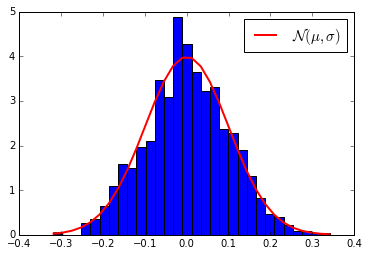

In [149]:
count, bins, ignored = plt.hist(s, 30, normed=True)
plt.plot(bins, np.exp( -(bins-mu)**2 / (2*sigma**2) ) / (sigma * np.sqrt(2*np.pi)), 
         color='r', lw=2.0, label=r'$\cal{N(\mu, \sigma)}$');
plt.legend(fontsize=15);

In [150]:
x = np.array([1, 2, 3, -1, 5])

In [151]:
mx = np.ma.masked_array(x, mask=[0, 0, 0, 1, 0])

In [152]:
mx.data, mx.mask

(array([ 1,  2,  3, -1,  5]),
 array([False, False, False,  True, False], dtype=bool))

In [153]:
mx.mean()

2.75

In [154]:
x = np.ma.array([1, 2, 3])

In [155]:
x[0] = np.ma.masked
x

masked_array(data = [-- 2 3],
             mask = [ True False False],
       fill_value = 999999)

In [156]:
x = np.ma.array([-1, 1, 0, 2, 3], mask=[0, 0, 0, 0, 1])

In [157]:
np.log(x)

/Users/Kamilobu/anaconda/envs/ay250/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
/Users/Kamilobu/anaconda/envs/ay250/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':


masked_array(data = [-- 0.0 -- 0.6931471805599453 --],
             mask = [ True False  True False  True],
       fill_value = 1e+20)